# **Finding Outliers**


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)
pd.set_option('display.max_columns', None)
#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


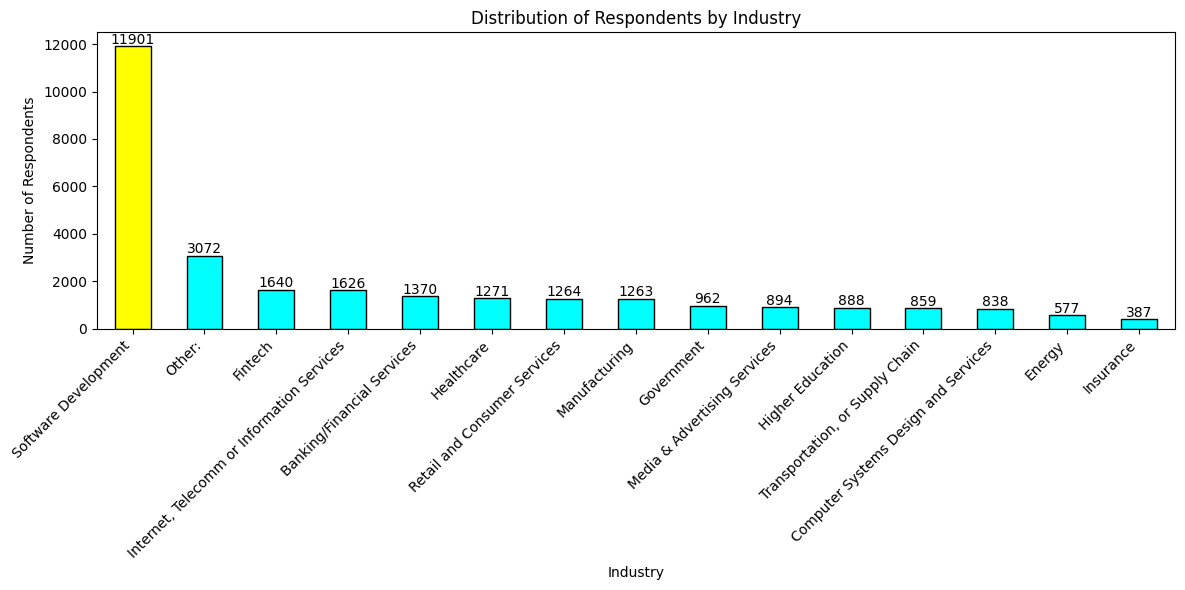

In [31]:

industry_counts = df["Industry"].value_counts()
#highlighting trend
colors = ['cyan' if count < industry_counts.max() else 'yellow' for count in industry_counts.values]

# Plotting the bar chart
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar', color=colors,edgecolor='black')

# Adding labels and title
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Annotate the bar
for index, value in enumerate(industry_counts):
    plt.text(x=index, y=value+100, s=str(value), ha='center')

plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
# Basic statistics for ConvertedCompYearly
mean_salary = df['ConvertedCompYearly'].mean()
median_salary = df['ConvertedCompYearly'].median()
std_salary = df['ConvertedCompYearly'].std()

print(f"Mean: ${mean_salary:,.2f}")
print(f"Median: ${median_salary:,.2f}")
print(f"Standard Deviation: ${std_salary:,.2f}")

Mean: $86,155.29
Median: $65,000.00
Standard Deviation: $186,756.97


In [5]:
# Define threshold: 3 standard deviations above the mean
threshold = mean_salary + 3 * std_salary

# Filter out outliers
outliers = df[df['ConvertedCompYearly'] > threshold]

print(f"Threshold for outliers: ${threshold:,.2f}")
print(f"Number of outliers: {len(outliers)}")
outliers[['ConvertedCompYearly']].head()

Threshold for outliers: $646,426.21
Number of outliers: 89


,ConvertedCompYearly
529,650000.0
828,1000000.0
1932,945000.0
2171,750000.0
2187,2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [6]:
# Drop missing values if any
comp_data = df['ConvertedCompYearly'].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: ${Q1:,.2f}")
print(f"Q3: ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")


Q1: $32,712.00
Q3: $107,971.50
IQR: $75,259.50
Lower bound: $-80,177.25
Upper bound: $220,860.75


In [7]:
outliers_iqr = comp_data[(comp_data < lower_bound) | (comp_data > upper_bound)]

print(f"Number of outliers: {len(outliers_iqr)}")

Number of outliers: 978


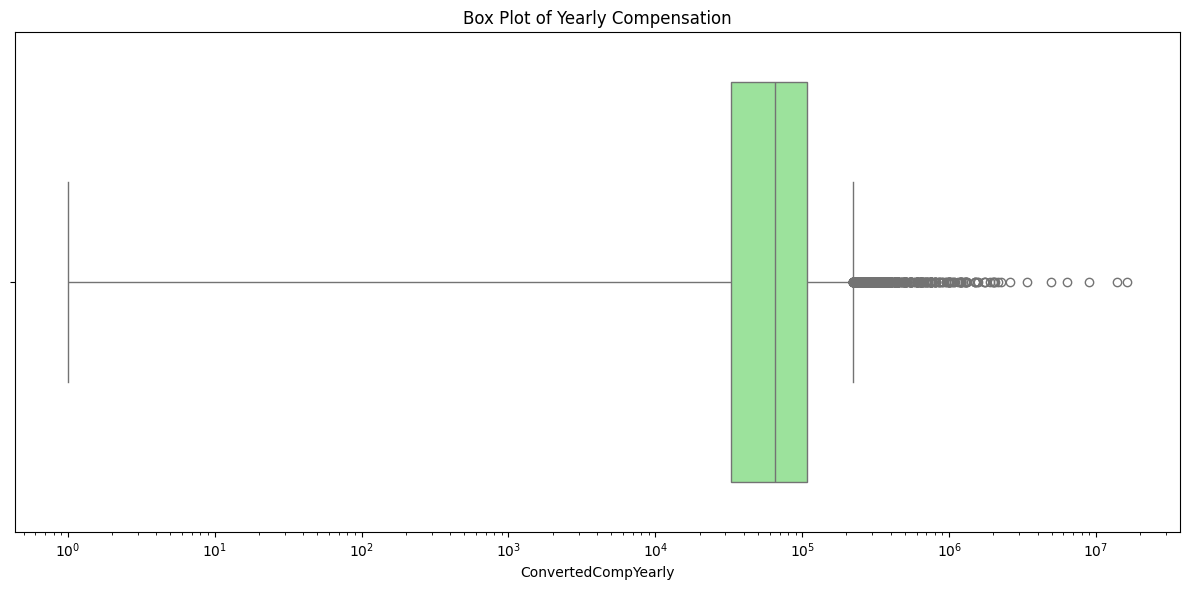

In [8]:
# Box plot
plt.figure(figsize=(12,6))

sns.boxplot(x=df["ConvertedCompYearly"], color='lightgreen')
plt.title('Box Plot of Yearly Compensation')
plt.xlabel('ConvertedCompYearly')
plt.xscale('log')
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [9]:
# Create a new DataFrame excluding outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

In [10]:
#Validate the size of the new DataFrame
print(f"Original DataFrame size: {df.shape[0]} rows")
print(f"New DataFrame size (without outliers): {df_no_outliers.shape[0]} rows")
print(f"Number of rows removed: {df.shape[0] - df_no_outliers.shape[0]}")

Original DataFrame size: 65437 rows
New DataFrame size (without outliers): 22457 rows
Number of rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [23]:
import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               'Prefer not to say': np.nan  # Can drop or impute
               }

df["Age_mapped"] = df["Age"].map(age_mapping)

# Drop NULL values
df = df.dropna(subset=['Age_mapped'])

# Select Numeric columns
#numeric_columns = df.select_dtypes(include= 'number').columns

# Correlation Matrix
#correlation = df[numeric_columns].corr() 
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Age_mapped
ResponseId,1.000000,-0.000000,0.012618,-0.002543,-0.015826,-0.014214,-0.002071,0.002049,-0.002748,0.001858,-0.005374,-0.005954,-0.008429,0.002690,-0.038042
CompTotal,-0.000000,0.000000,0.028791,-0.004892,-0.002719,-0.003033,-0.006313,-0.005894,-0.004585,-0.004495,-0.003199,-0.003046,0.080464,-0.015774,-0.002778
WorkExp,0.012618,0.028791,1.000000,-0.026545,-0.066776,-0.104391,-0.064473,-0.100777,-0.046744,-0.088080,-0.113251,-0.108048,0.154188,0.097581,0.850044
JobSatPoints_1,-0.002543,-0.004892,-0.026545,1.000000,0.446022,0.634020,0.618927,0.603409,0.627714,0.598033,0.585362,0.608060,0.020359,0.094464,-0.027957
JobSatPoints_4,-0.015826,-0.002719,-0.066776,0.446022,1.000000,0.526343,0.449338,0.459402,0.438877,0.472763,0.499413,0.528500,0.018075,0.029592,-0.076073
JobSatPoints_5,-0.014214,-0.003033,-0.104391,0.634020,0.526343,1.000000,0.614003,0.607982,0.630436,0.619848,0.643587,0.691132,-0.023294,0.049220,-0.101834
JobSatPoints_6,-0.002071,-0.006313,-0.064473,0.618927,0.449338,0.614003,1.000000,0.692272,0.645123,0.632425,0.592532,0.604654,-0.008561,0.051382,-0.050721
JobSatPoints_7,0.002049,-0.005894,-0.100777,0.603409,0.459402,0.607982,0.692272,1.000000,0.698292,0.659770,0.642948,0.618587,-0.036413,0.038372,-0.083344
JobSatPoints_8,-0.002748,-0.004585,-0.046744,0.627714,0.438877,0.630436,0.645123,0.698292,1.000000,0.656029,0.617454,0.625301,-0.011083,0.058317,-0.046559
JobSatPoints_9,0.001858,-0.004495,-0.088080,0.598033,0.472763,0.619848,0.632425,0.659770,0.656029,1.000000,0.663859,0.650916,-0.015835,0.039262,-0.082184


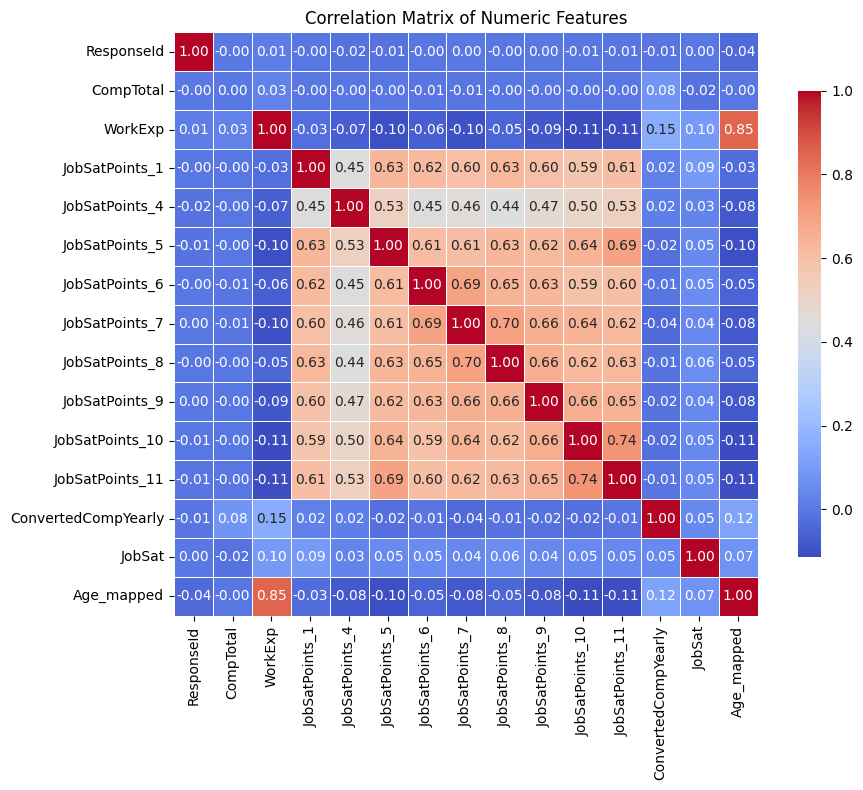

In [19]:
# Visulaizing correlation matrix using heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, square=True, cbar_kws={"shrink": .8})

# Add titles
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

<h3> Summary </h3>


 **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. 


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.
